In [ ]:
# LSTM(Long Short-Term Memory)
# RNN의 장기의존성 문제를 해결하기위해 고안됨
# 장기의존성 문제: 은닉층의 과거의 정보가 마지막까지 전달되지 못하는 현상

# 1. 은닉상태 만듬 : 입력과 이전 타임스텝의 은닉상태를 가중치에 곱한 후
#                    활성화함수(시그모이드)를 통과시켜 다음 은닉상태를 만듬

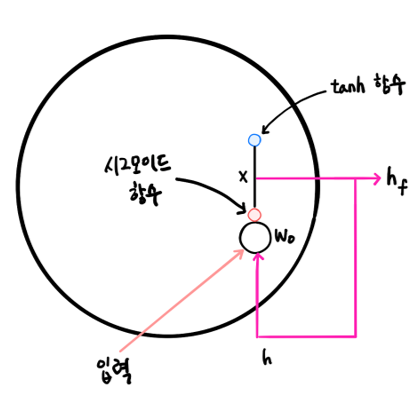

In [ ]:
# 위 그림은 W_x 와 W_h 를 통틀어 W_o 로 표시했음

# tanh 함수를 통과하는 값은 ???
# LSTM에는 순환되는 상태가 2개이다. (은닉상태, 셀 상태)
# 은닉상태와 달리 셀 상태는 다음 층으로 전달되지 않고, LSTM 셀에서 순환만 되는 값이다.

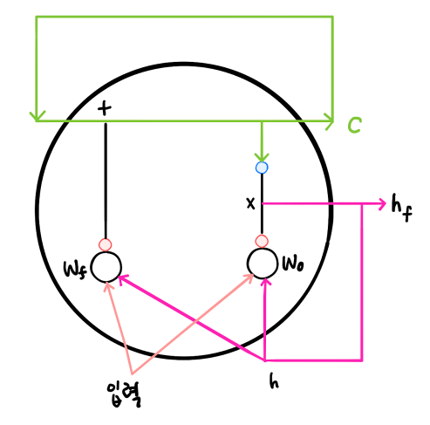

In [ ]:
# 위 그림의 녹색은 순환되는 셀의 상태
# 셀 상태를 은닉상태 h와 구분하여 c로 표시

# 입력과 은닉상태를 가중치 W_f에 곱 -> 시그모이드 함수
# 이전 타임스텝의 셀 상태와 곱 -> 새로운 셀의 상태 -> tanh함수 통과 -> 새 은닉상태를 만드는데 기여
# LSTM은 마치 작은 셀을 여러개 포함하고 있는 큰 셀
# W_o 와 W_f 는 각각 다른 기능을 위해 훈련됨

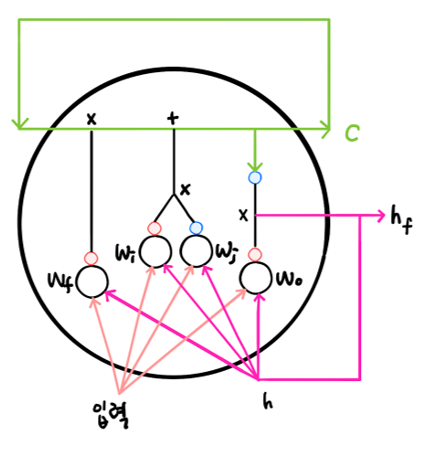

In [ ]:
# 이전과 마찬가지로 입력과 은닉상태를 각각 다른 가중치에 곱한 후
# 각각 시그모이드, tanh함수를 통과
# 두 결과를 곱한 후 이전 셀의 상태와 더함

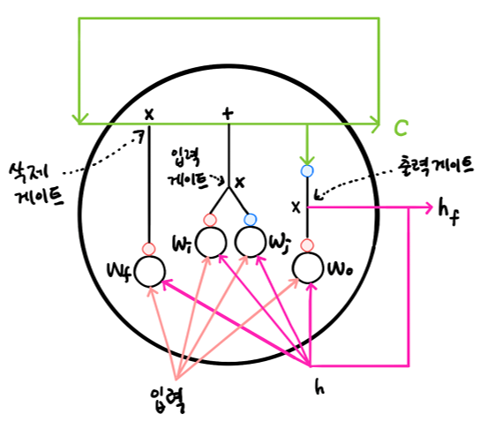

In [ ]:
# 세군데 곱셈을 삭제 게이트, 입력 게이트, 출력 게이트라고 부름
# 삭제게이트는 셀의 상태에 있는 정보를 제거하는 역할
# 입력게이트는 새로운 정보를 셀 상태에 추가
# 출력게이트를 통해 이 셀 상태가 다음 은닉 상태로 출력
# 위의 처리는 케라스의 LSTM클래스가 알아서 돌림

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

tf.keras.utils.set_random_seed(42)

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

print(train_input.shape, val_input.shape, test_input.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(20000,) (5000,) (25000,)


In [2]:
# 케라스의 pad_sequences()함수로 각 샘플의 길이를 100에 맞추고 부족할 때 패딩을 추가함.
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) # truncating='pre' 생략가능(기본값)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq[5]) # 여섯번째 토큰을 확인 해보면 앞쪽에 0으로 채워짐

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [3]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,))) # 벡터 이용한 토큰 처리
                              # num_words=500 어휘사전크기
                                     # 임베딩백터크기 16
                                            # maxlen=100
model.add(keras.layers.LSTM(8)) # 뉴런개수 8
model.add(keras.layers.Dense(1, activation='sigmoid'))  # 활성화 함수 시그모이드(2진분류)

model.summary()
# SimpleRNN 클래스의 모델 파라미터 개수는 200 개였다.
# LSTM 셀에는 작은 셀이 4개 있으므로 정확히 800임

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# 배치 크기는 64개 , 에포크 회수는 100으로 지정
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                            # batch_size=64, 몇 개의 샘플로 가중치를 갱신할 것인지 설정합니다.
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 체크포인트, 조기종료 동일

# 16~17분

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - accuracy: 0.7600 - loss: 0

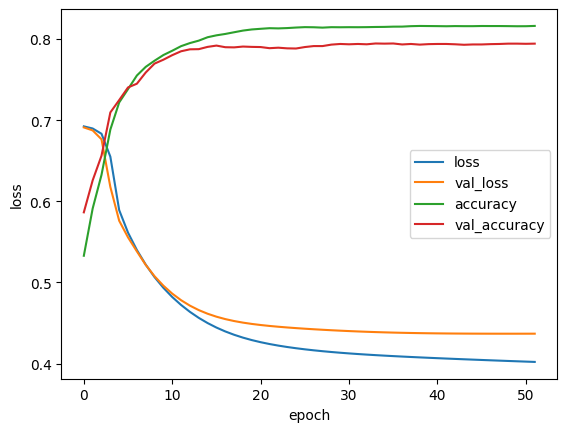

In [5]:
# 52회 에포크에 81.67% 정확도로 나옴

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()

In [6]:
# 결과를 보면 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행하는 것처럼 보임
# 하지면 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다.(드롭 아웃)

# 순환층은 자체적으로 드롭아웃 기능을 제공한다.

# SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
# dropout은 셀의 입력에 드롭아웃을 적용
# recurrent_dropout은 순환은닉 상태에 드롭아웃을 적용함

# recurrent_dropout을 사용하면 GPU를 사용하여 모델을 훈련하지 못함(모델의 훈련속도가 크게 느려짐)
# 그래서 이번에는 dropout만 적용 해볼 것

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # 드롭아웃 매개값 0.3으로 지정 (30% 입력의 드롭아웃)
model2.add(keras.layers.Dense(1, activation='sigmoid'))


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

# 13~14분

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5716 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.5619 - loss: 0.6920 - val_accuracy: 0.6068 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.6025 - loss: 0.6902 - val_accuracy: 0.6288 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6257 - loss: 0.6865 - val_accuracy: 0.6490 - val_loss: 0.6809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.6458 - loss: 0.6773 - val_accuracy: 0.6560 - val_loss: 0.6494
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.6848 - loss: 0.6394 - val_accuracy: 0.7270 - val_loss: 0.5991
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7198 - loss: 0.5997 - val_accuracy: 0.7404 - val_loss: 0.5803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.7326 - loss: 0

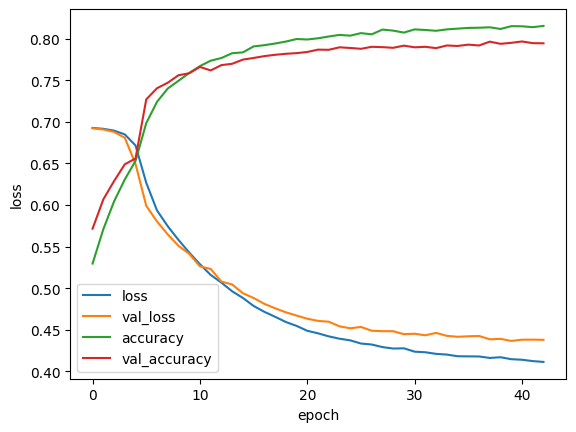

In [8]:
# 드롭아웃 전에는 52회 에포크에 81.67% 정확도로 나옴 16분 걸림
# 드롭이웃 이후에는 44회 에포크에 81.82% 정확도 이고 13분 걸림
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show() # 훈련손실과 검증 손실 차이가 좁혀진 것을 확인 할 수 있음

# 드롭아웃으로 인해 그래프가 울퉁불퉁함

In [ ]:
# 2개의 층 연결하기

# 순환층을 연결할 때는 한가지 주의할 점이 있는데
# 순환층의 은닉 상태는 샘플의 마지막 타임스탭에 대한 은닉 상태만 다음층으로 전달됨

# 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
# 앞쪽의 순환층이 모든 타임스텝에 대한 은닉상태를 출력해야 함
# 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력 해야 한다. (처음에 본 그림)

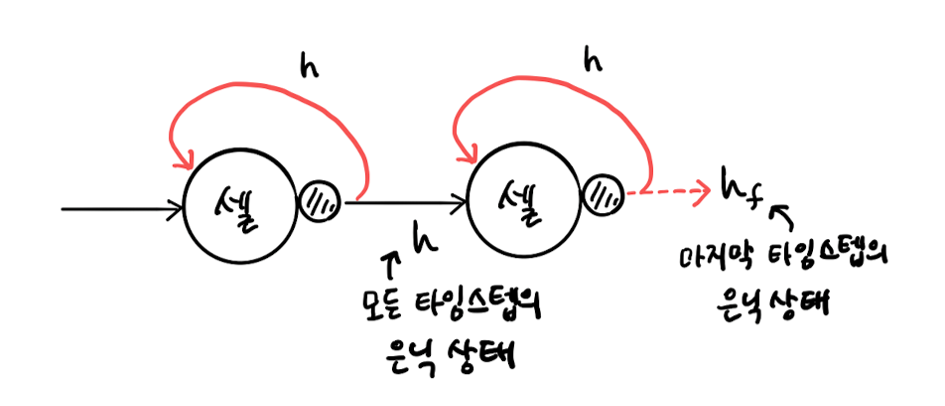

In [9]:
# 케라스의 순환층에서 모든 타임스템의 은닉 상태를 출력하려면
# 마지막을 제외한 다른 모든 순환층에서 return_sequences=True 로 지정함
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 1번 LSTM
model3.add(keras.layers.LSTM(8, dropout=0.3))                        # 2번 LSTM
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()
# 첫번째 LSTM 층이 모든 타임스텝(100개)의 은닉상태를 출력하기 때문에
# 출력 크기가(None, 100, 8)로 표시됨

# 이에 반해 두 번째 LSTM층의 출력 크기는 마지막 타임 스텝의 은닉상태만 출력 하기 때문에
# (None, 8)이다.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 훈련시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

# 10~11분

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 97ms/step - accuracy: 0.5235 - loss: 0.6927 - val_accuracy: 0.5964 - val_loss: 0.6907
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 106ms/step - accuracy: 0.5854 - loss: 0.6888 - val_accuracy: 0.6470 - val_loss: 0.6764
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.6495 - loss: 0.6604 - val_accuracy: 0.7104 - val_loss: 0.5774
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - accuracy: 0.7134 - loss: 0.5717 - val_accuracy: 0.7346 - val_loss: 0.5318
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.7405 - loss: 0.5346 - val_accuracy: 0.7580 - val_loss: 0.5051
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.7571 - loss: 0.5090 - val_accuracy: 0.7616 - val_loss: 0.4972
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.7712 - loss: 0.4930 - val_accuracy: 0.7654 - val_loss: 0.4921
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.7732 - loss: 

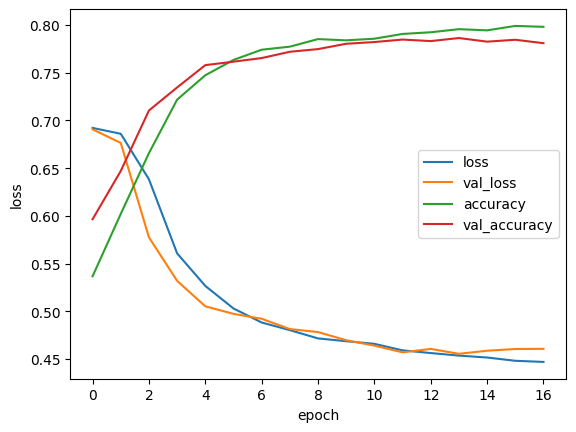

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show() # 과대적합을 제어하면서 손실을 최대한 낮춘 느낌이다.

In [ ]:
# 역전파(Back Propagation)관점에서는 tanh가 sigmoid보다 미분 최대값이 더 크기 때문에
# vanishing gradinent 문제에 더 잘 버티는 것은 tanh 입니다. 따라서 tanh함수를 활성함수로 씁니다.

# 시그모이드는 입력 정보 중 어떤 부분을 업데이트할지 결정합니다. 시그모이드 함수는 0과 1 사이의 값을 출력하므로, 정보를 선택적으로 기억할 수 있게 합니다. 즉, **"어떤 정보를 기억할지"**에 대한 결정을 내립니다.
# tanh는 새로운 정보를 얼마나 추가할지 결정하는 데 사용됩니다. 이 값은 -1에서 1 사이의 값으로, 추가될 정보의 크기를 조절합니다. 즉, 입력 값의 범위를 제어하면서 새로운 정보를 얼마나 반영할지를 조절합니다.

# tanh 함수의 출력 값이 음수 -> 기존 정보가 반대 방향으로 수정되거나 조정된다는 의미로, 그 정보가 기존의 정보를 부정적으로 바꾸는 역할을 하게 됩니다.

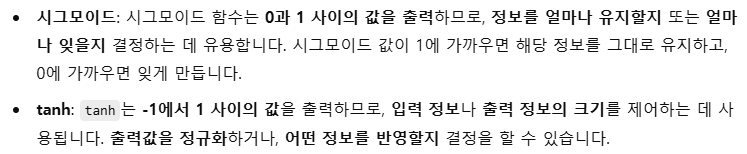

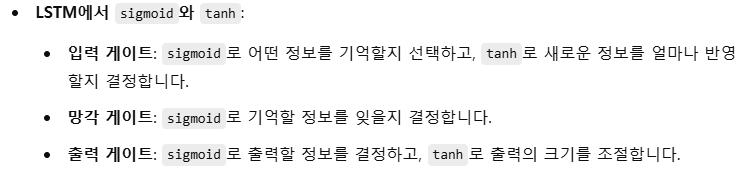

In [ ]:
# GRU(Gated Recurrent Units) 구조
# 뉴욕 대학교 조경현 교수가 발명한 셀로 유명함(LSTM을 간소화 버전으로 만듬)
# 셀상태를 계산하지 않고 은닉상태 하나만 포함하고 있다.

# 경험적으로 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU가 조금 더 낫고, 데이터 양이 더 많으면 LSTM이 더 낫다고도 합니다.
# GRU보다 LSTM에 대한 연구나 사용량이 더 많은데, 이는 LSTM이 더 먼저 나온 구조이기 때문입니다.

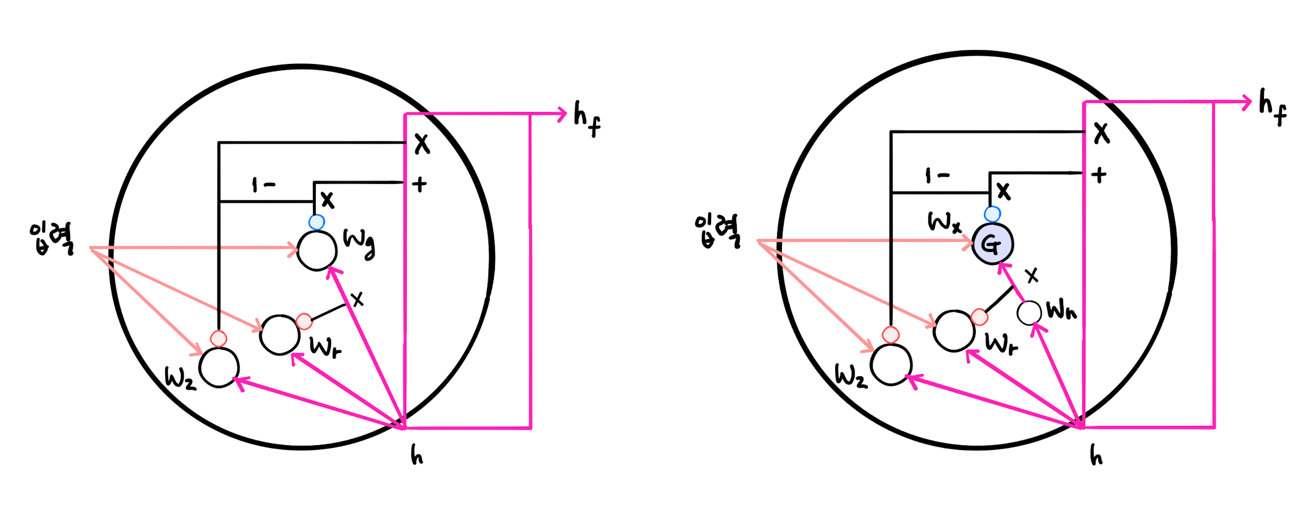

In [ ]:
# GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어있다
# 2개는 시그모이드, 1개는 tanh
# W_z를 사용하는 셀의 출력이 은닉상태에서 곱해져 망각게이트 역할을 수행
# 이와 똑같은 출력을 1에서 뺀 다음에 가장 오른쪽 W_g를 사용하는 셀의 출력에 곱해 입력되는 정보를 제어하는 역할을 수행
# W_r 셀에서는 출력된 W_g 셀이 사용할 은닉상태의 정보를 제어

In [12]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8, dropout=0.3, return_sequences=True)) # GRU로 변경함
model4.add(keras.layers.GRU(8, dropout=0.3))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
# 파라미터를 계산해 보겠다. GRU 셀에는 3개의 작은 셀이 있다.
# 작은 셀에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.
# 입력에 곱하는 가중치는 16 * 8 = 128개 이고, 은닉 상태에 곱하는 가중치는 8 * 8 = 64 이다.
# 절편은 뉴런마다 하나씩이므로 8개임
# 모두 더하면 128 + 64 + 8 = 200 이런 작은 셀이 3개 이므로 600개 임

# 624개가 된 이유는 3개의 절편마다 8개의 뉴런까지 존재하기 때문에 3 * 8 = 24 까지 더해짐
# 600 + (3 * 8) = 624
# 텐서플로가 이런 계산 방식을 사용하는 이유는 GPU를 잘 활용하기 위해서 임 (LSTM 개선점)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 100, 8)              │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 8)                   │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,065 (35.41 KB)

 Trainable params: 9,065 (35.41 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

# 18분

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 124ms/step - accuracy: 0.4956 - loss: 0.6932 - val_accuracy: 0.5064 - val_loss: 0.6929
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.5209 - loss: 0.6928 - val_accuracy: 0.5320 - val_loss: 0.6925
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 119ms/step - accuracy: 0.5419 - loss: 0.6923 - val_accuracy: 0.5552 - val_loss: 0.6918
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 122ms/step - accuracy: 0.5533 - loss: 0.6915 - val_accuracy: 0.5814 - val_loss: 0.6905
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 128ms/step - accuracy: 0.5743 - loss: 0.6900 - val_accuracy: 0.6020 - val_loss: 0.6881
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 121ms/step - accuracy: 0.5959 - loss: 0.6870 - val_accuracy: 0.6132 - val_loss: 0.6837
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 118ms/step - accuracy: 0.6063 - loss: 0.6823 - val_accuracy: 0.6218 - val_loss: 0.6757
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.6213 -

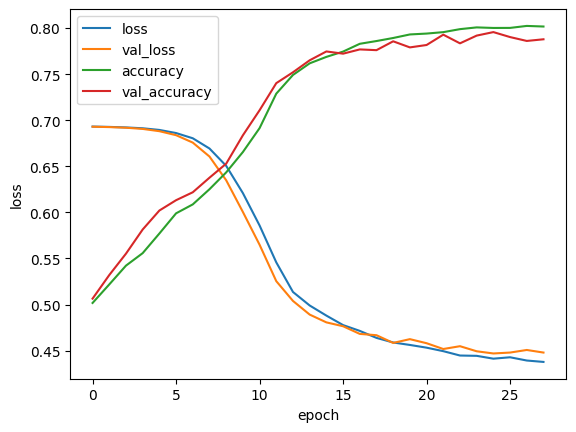

In [14]:
# LSTM : 드롭아웃 전에는 52회 에포크에 81.67% 정확도로 나옴 16분 걸림
# LSTM : 드롭이웃 이후에는 44회 에포크에 81.82% 정확도 이고 13분 걸림
# LSTM : 층을 추가하고 return_sequences=True로 진행한 이후 15분에 25회 79.90% 정확도가 나옴
# GRU : 드롭아웃 30%, 층을 추가하고 return_sequences=True로 진행한 이후 20분 30회 80.15% 정확도
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss','accuracy', 'val_accuracy'])
plt.show()

In [15]:
test_seq = pad_sequences(test_input, maxlen=100)

rnn_model = keras.models.load_model('best-2rnn-model.keras')

rnn_model.evaluate(test_seq, test_target)
# LSTM 2층으로 만든 테스트 점수

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.7877 - loss: 0.4545


[0.4543180465698242, 0.7878400087356567]

In [16]:
test_seq = pad_sequences(test_input, maxlen=100)

gru_model = keras.models.load_model('best-gru-model.keras')

gru_model.evaluate(test_seq, test_target)
# GRU 2층으로 만든 테스트 점수

# 데이터 양이 적은 편이라 GRU가 조금 더 나은 결과

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.7958 - loss: 0.4448


[0.44477447867393494, 0.7943599820137024]